In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [48]:
#dropList = ['Davidson', 'Huntersville', 'Unknown']
#dropList = ['2016', '2017', '2023']


cleancrimeDF5 = crimeDF.drop(crimeDF.loc[crimeDF['CMPD_PATROL_DIVISION']=='Davidson'].index)
cleancrimeDF6 = cleancrimeDF5.drop(crimeDF.loc[crimeDF['CMPD_PATROL_DIVISION']=='Huntersville'].index)
cleancrimeDF = cleancrimeDF6.drop(crimeDF.loc[crimeDF['CMPD_PATROL_DIVISION']=='Unknown'].index)

cleancrimeDF['CMPD_PATROL_DIVISION'].unique()

array(['North', 'Independence', 'Metro', 'Providence', 'South',
       'Hickory Grove', 'University City', 'Steele Creek', 'Eastway',
       'Westover', 'North Tryon', 'Freedom', 'Central', 'Airport', nan],
      dtype=object)

In [36]:
locType = cleancrimeDF.groupby(['LOCATION_TYPE_DESCRIPTION'])['HIGHEST_NIBRS_DESCRIPTION'].count()
locType

LOCATION_TYPE_DESCRIPTION
Indoors         278028
Other            17899
Outdoors        226666
Parking Deck      9028
Parking Lot      92863
Name: HIGHEST_NIBRS_DESCRIPTION, dtype: int64

In [37]:
placeType = cleancrimeDF.groupby(['PLACE_TYPE_DESCRIPTION'])['HIGHEST_NIBRS_DESCRIPTION'].count()
placeType

PLACE_TYPE_DESCRIPTION
Commercial Place           99905
Open Area                  99108
Public/Non-Residential     37929
Residential               291109
Retail                     96434
Name: HIGHEST_NIBRS_DESCRIPTION, dtype: int64

In [38]:
locPlaceType = cleancrimeDF.groupby(['LOCATION_TYPE_DESCRIPTION', 'PLACE_TYPE_DESCRIPTION', 'PLACE_DETAIL_DESCRIPTION', 'HIGHEST_NIBRS_DESCRIPTION'])['HIGHEST_NIBRS_DESCRIPTION'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(locPlaceType)

LOCATION_TYPE_DESCRIPTION  PLACE_TYPE_DESCRIPTION  PLACE_DETAIL_DESCRIPTION                 HIGHEST_NIBRS_DESCRIPTION                 
Indoors                    Commercial Place        ATM                                      All Other Offenses                                1
                                                                                            All Other Thefts                                 18
                                                                                            Burglary/B&E                                      2
                                                                                            Counterfeiting/Forgery                           28
                                                                                            Credit Card/Teller Fraud                        255
                                                                                            Damage/Vandalism Of Property                      1
 

In [39]:
types = cleancrimeDF['HIGHEST_NIBRS_DESCRIPTION'].unique()
print(len(types))
print(types)

72
['All Other Offenses' 'All Other Thefts'
 'Theft of Motor Vehicle Parts from Vehicle'
 'Sudden/Natural Death Investigation' 'Theft From Motor Vehicle'
 'Shoplifting' 'Suicide' 'Other Unlisted Non-Criminal' 'Affray'
 'Missing Person' 'Simple Assault' 'Motor Vehicle Theft' 'Intimidation'
 'Damage/Vandalism Of Property' 'Burglary/B&E' 'Aggravated Assault'
 'Robbery' 'Drug/Narcotic Violations' 'Trespass Of Real Property'
 'Credit Card/Teller Fraud' 'Impersonation' 'Forcible Fondling'
 'Identity Theft' 'Public Accident' 'Disorderly Conduct'
 'Weapon Law Violations' 'Overdose' 'Theft From Building'
 'Extortion/Blackmail' 'Driving Under The Influence'
 'Hacking/Computer Invasion' 'False Pretenses/Swindle'
 'Counterfeiting/Forgery' 'Pocket-Picking' 'Stolen Property Offenses'
 'Forcible Rape' 'Indecent Exposure' 'Vehicle Recovery' 'Kidnapping'
 'Drug Equipment Violations' 'Embezzlement' 'Arson'
 'Pornography/Obscene Material' 'Fire (Accidental/Non-Arson)' 'Murder'
 'Family Offenses; Nonviole

In [40]:
typeReclass = {'HIGHEST_NIBRS_DESCRIPTION':
{
    'All Other Offenses':'Other', 'All Other Thefts':'Theft',
    'Theft of Motor Vehicle Parts from Vehicle':'Theft',
    'Sudden/Natural Death Investigation':'Other',
    'Theft From Motor Vehicle':'Theft',
    'Shoplifting':'Theft', 'Suicide':'Other', 'Other Unlisted Non-Criminal':'Other', 'Affray':'Violent Crime',
    'Missing Person':'Other', 'Simple Assault':'Violent Crime', 'Motor Vehicle Theft':'Theft', 'Intimidation':'Violent Crime',
    'Damage/Vandalism Of Property':'Violent Crime', 'Burglary/B&E':'Theft', 'Aggravated Assault':'Violent Crime',
    'Robbery':'Theft', 'Drug/Narcotic Violations':'Drug Related Crime', 'Trespass Of Real Property':'Other',
    'Credit Card/Teller Fraud':'Financial Crime', 'Impersonation':'Other', 'Forcible Fondling':'Sex Crime',
    'Identity Theft':'Other', 'Public Accident':'Response to Accident', 'Disorderly Conduct':'Other',
    'Weapon Law Violations':'Other', 'Overdose':'Response to Accident', 'Theft From Building':'Theft',
    'Extortion/Blackmail':'Other', 'Driving Under The Influence':'Drug Related Crime',
    'Hacking/Computer Invasion':'Other', 'False Pretenses/Swindle':'Financial Crime',
    'Counterfeiting/Forgery':'Financial Crime', 'Pocket-Picking':'Theft', 'Stolen Property Offenses':'Theft',
    'Forcible Rape':'Sex Crime', 'Indecent Exposure':'Sex Crime', 'Vehicle Recovery':'Response to Accident', 'Kidnapping':'Other',
    'Drug Equipment Violations':'Drug Related Crime', 'Embezzlement':'Financial Crime', 'Arson':'Violent Crime',
    'Pornography/Obscene Material':'Sex Crime', 'Fire (Accidental/Non-Arson)':'Response to Accident', 'Murder':'Violent Crime',
    'Family Offenses; Nonviolent':'Other', 'Statutory Rape':'Sex Crime', 'Purse-Snatching':'Theft',
    'Sexual Assault With Object':'Sex Crime', 'Wire Fraud':'Financial Crime', 'Animal Cruelty':'Violent Crime',
    'Dog Bite/Animal Control Incident':'Other', 'Liquor Law Violations':'Drug Related Crime', 'Peeping Tom':'Sex Crime',
    'Assisting Gambling':'Financial Crime', 'Curfew/Loitering/Vagrancy Violations':'Other',
    'Forcible Sodomy':'Sex Crime', 'Worthless Check: Felony (over $2000)':'Financial Crime',
    'Justifiable Homicide':'Violent Crime', 'Prostitution':'Sex Crime',
    'Human Trafficking, Involuntary Servitude':'Other',
    'Human Trafficking, Commercial Sex Acts':'Sex Crime',
    'Theft From Coin-Operated Machine Or Device':'Theft', 'Negligent Manslaughter':'Violent Crime',
    'Incest':'Sex Crime', 'Gambling Equipment Violations':'Financial Crime', 'Betting/Wagering':'Financial Crime',
    'Welfare Fraud':'Financial Crime', 'Purchasing Prostitution':'Sex Crime', 'Assisting Prostitution':'Sex Crime',
    'Gas Leak':'Response to Accident', 'Bribery':'Financial Crime'}}

cleancrimetypeDF = cleancrimeDF.replace(typeReclass)


In [41]:
locPlaceType = cleancrimetypeDF.groupby(['LOCATION_TYPE_DESCRIPTION', 'PLACE_TYPE_DESCRIPTION', 'HIGHEST_NIBRS_DESCRIPTION'])['HIGHEST_NIBRS_DESCRIPTION'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(locPlaceType)

LOCATION_TYPE_DESCRIPTION  PLACE_TYPE_DESCRIPTION  HIGHEST_NIBRS_DESCRIPTION
Indoors                    Commercial Place        Drug Related Crime             759
                                                   Financial Crime               6267
                                                   Other                        10265
                                                   Response to Accident           620
                                                   Sex Crime                      624
                                                   Theft                        17149
                                                   Violent Crime                 7744
                           Open Area               Drug Related Crime             113
                                                   Financial Crime                 84
                                                   Other                          573
                                                   Response to 

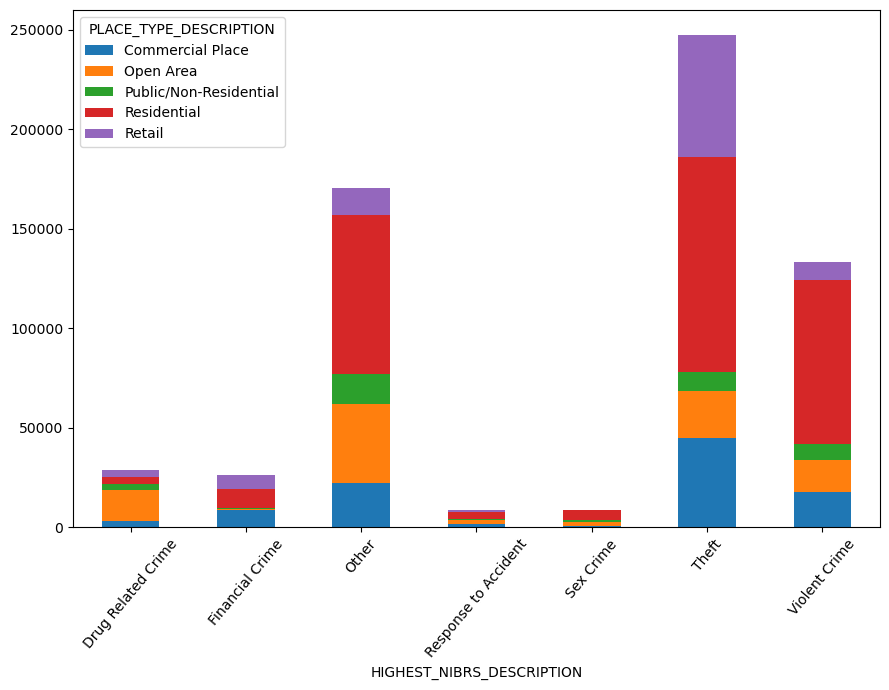

In [42]:
placeType = cleancrimetypeDF.groupby(['PLACE_TYPE_DESCRIPTION', 'HIGHEST_NIBRS_DESCRIPTION'])['HIGHEST_NIBRS_DESCRIPTION'].count()
figs = placeType.unstack(level=0).plot(kind='bar', subplots=False, rot=50, figsize=(9, 7), legend=True, stacked=True)
plt.tight_layout()
plt.savefig('placeType.png')

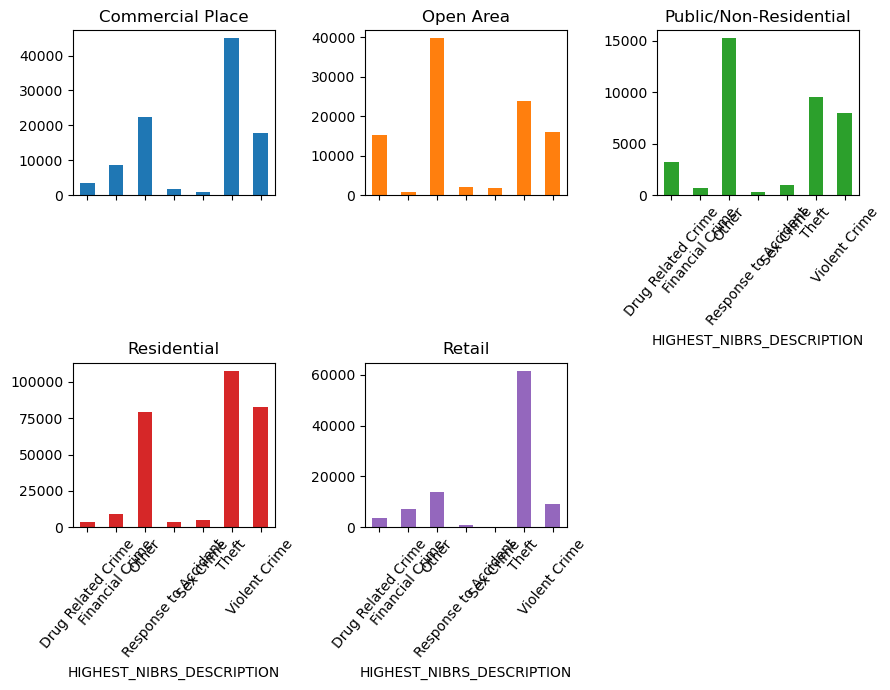

In [33]:
figs = placeType.unstack(level=0).plot(kind='bar', subplots=True, rot=50, figsize=(9, 7), legend=False, layout=(2,3))
plt.tight_layout()

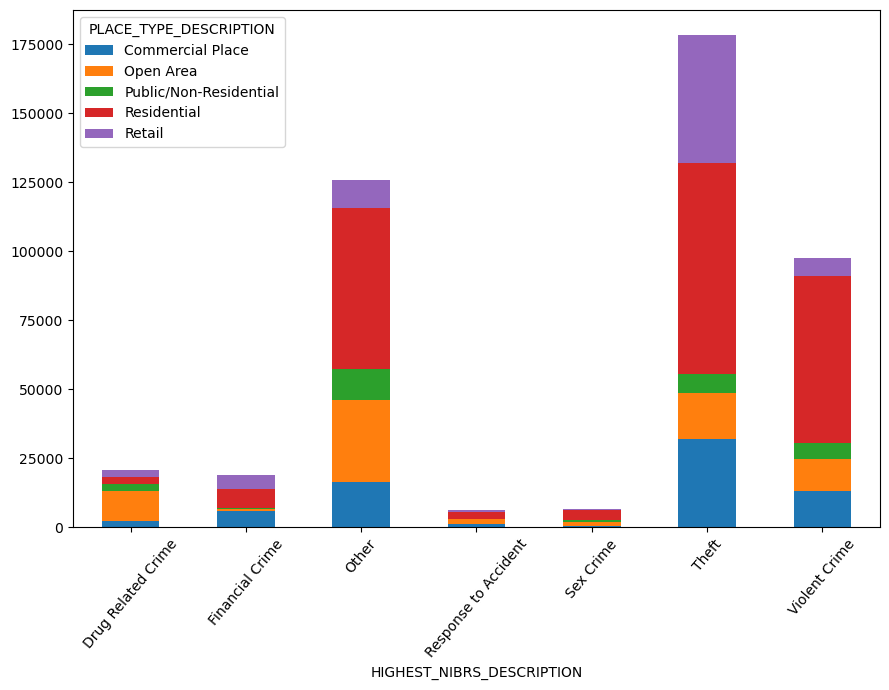

In [53]:
cleancrimeDFv2 = cleancrimeDF[(cleancrimeDF['YEAR'] == 2018)|(cleancrimeDF['YEAR'] == 2019)|(cleancrimeDF['YEAR'] == 2020)|(cleancrimeDF['YEAR'] == 2021)|(cleancrimeDF['YEAR'] == 2022)]
cleancrimetypeDFv2 = cleancrimeDFv2.replace(typeReclass)
#crimeDF2['YEAR'].unique()
placeType2 = cleancrimetypeDFv2.groupby(['PLACE_TYPE_DESCRIPTION', 'HIGHEST_NIBRS_DESCRIPTION'])['HIGHEST_NIBRS_DESCRIPTION'].count()
figs = placeType2.unstack(level=0).plot(kind='bar', subplots=False, rot=50, figsize=(9, 7), legend=True, stacked=True)
plt.tight_layout()
plt.savefig('placeType18_22.png')

In [12]:
precinctCount = cleancrimeDF.groupby(['CMPD_PATROL_DIVISION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(precinctCount)


CMPD_PATROL_DIVISION  YEAR
Airport               2017      986
                      2018     1156
                      2019     1214
                      2020     1095
                      2021     1562
                      2022     1641
                      2023     1431
Central               2017     6101
                      2018     6015
                      2019     6146
                      2020     5318
                      2021     6259
                      2022     6976
                      2023     5741
Eastway               2017     5886
                      2018     5731
                      2019     6339
                      2020     5461
                      2021     5524
                      2022     5522
                      2023     4434
Freedom               2017     7097
                      2018     6778
                      2019     6710
                      2020     6177
                      2021     6070
                      2022     6401
 